In [ ]:
# getting data from yfinance package which pull latest data available for snp500
import yfinance as yf


In [ ]:
sp500=yf.Ticker("^GSPC")

In [ ]:
# give historical data using only trading days

sp500=sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

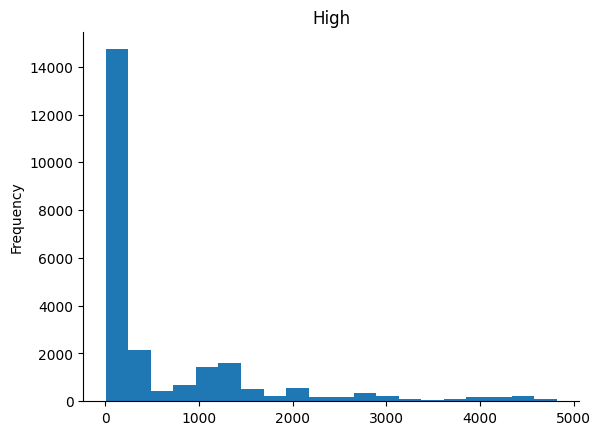

In [ ]:
from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

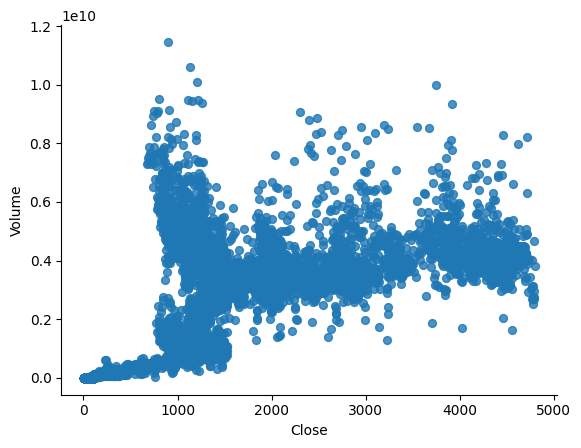

In [ ]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Date'>

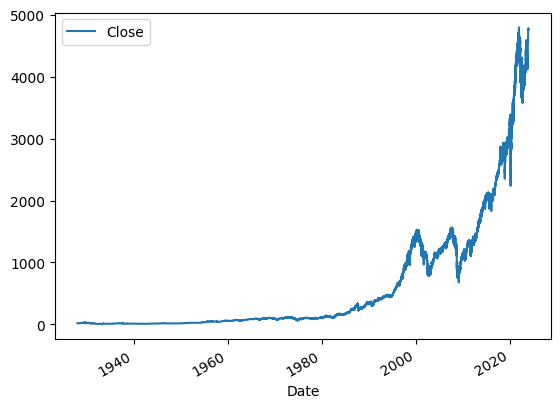

In [ ]:
# this one show graph between closing price on that day and with the date
# this is show that the price of maket where close like max price
sp500.plot.line(y="Close", use_index=True)

In [ ]:
# Removing extra column form the data which is not relevent to the project

del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
# model to predict weather price go up or dowm for tomorrow

sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [ ]:
# change the numerical value for the the table given
# find the rows where tomorrow price greater than close price
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [ ]:
# slicing the values of the data in which taking data after the data which is mationed below there
sp500=sp500.loc["1990-01-25":].copy()

In [ ]:
# importing random forest classifier for the furthe analysis
from sklearn.ensemble import RandomForestClassifier

In [ ]:

model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [ ]:
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [ ]:
import pandas as pd
preds=pd.Series(preds,index=test.index)

In [ ]:
preds

Date
2023-08-09 00:00:00-04:00    1
2023-08-10 00:00:00-04:00    1
2023-08-11 00:00:00-04:00    1
2023-08-14 00:00:00-04:00    1
2023-08-15 00:00:00-04:00    1
                            ..
2023-12-22 00:00:00-05:00    0
2023-12-26 00:00:00-05:00    0
2023-12-27 00:00:00-05:00    0
2023-12-28 00:00:00-05:00    0
2023-12-29 00:00:00-05:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"],preds)

0.5084745762711864

<Axes: xlabel='Date'>

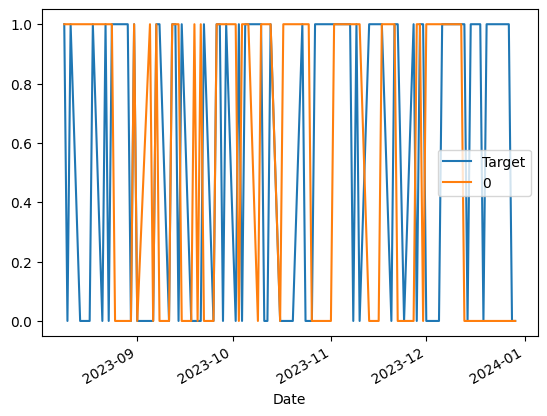

In [ ]:

combined=pd.concat([test["Target"],preds],axis=1)
combined.plot()


In [ ]:
# this is backtracking to improve my model accuracy

def predict(train, test, predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="Prediction")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined


In [ ]:
def backtest(data,model,predictors,start=2500,step=250):
  all_predictions=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    prediction=predict(train,test,predictors,model)
    all_predictions.append(prediction)
    return pd.concat(all_predictions)

In [ ]:
preditions=backtest(sp500,model,predictors)
preditions.value_counts()

Target  Prediction
0       0             96
1       0             86
        1             36
0       1             32
dtype: int64

In [ ]:
precision_score(preditions['Target'],preditions['Prediction'])

0.5294117647058824

In [ ]:
preditions['Target'].value_counts()/preditions.shape[0]

0    0.512
1    0.488
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1994-01-07 00:00:00-05:00,467.089996,470.260010,467.029999,469.899994,324920000,475.269989,1,1.002967,1.0,1.005392,3.0,1.010438,32.0,1.038348,129.0,1.187048,515.0
1994-01-10 00:00:00-05:00,469.899994,475.269989,469.549988,475.269989,319490000,474.130005,0,1.005682,2.0,1.012622,4.0,1.021676,32.0,1.049850,129.0,1.200160,516.0
1994-01-11 00:00:00-05:00,475.269989,475.279999,473.269989,474.130005,305490000,474.170013,1,0.998799,1.0,1.007086,3.0,1.019056,31.0,1.046989,128.0,1.196832,516.0
1994-01-12 00:00:00-05:00,474.130005,475.059998,472.140015,474.170013,310690000,472.470001,0,1.000042,1.0,1.004346,3.0,1.018933,32.0,1.046732,129.0,1.196476,517.0
1994-01-13 00:00:00-05:00,474.170013,474.170013,471.799988,472.470001,277970000,474.910004,1,0.998204,1.0,0.998483,3.0,1.015053,32.0,1.042636,129.0,1.191755,516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.070590,37.0,1.113889,135.0,1.199129,529.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.073161,38.0,1.117612,136.0,1.203740,529.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.204993,530.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    226
1.0     24
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5416666666666666

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.564
0    0.436
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2003-12-10 00:00:00-05:00,1,1.0
2003-12-11 00:00:00-05:00,1,0.0
2003-12-12 00:00:00-05:00,0,0.0
2003-12-15 00:00:00-05:00,1,0.0
2003-12-16 00:00:00-05:00,1,0.0
...,...,...
2004-12-01 00:00:00-05:00,0,0.0
2004-12-02 00:00:00-05:00,1,0.0
2004-12-03 00:00:00-05:00,0,0.0


from matplotlib import pyplot as plt
predictions['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions.plot(kind='scatter', x='Target', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

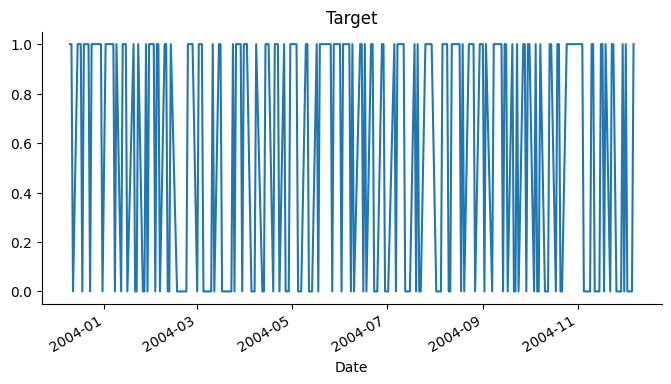

In [ ]:
from matplotlib import pyplot as plt
predictions['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

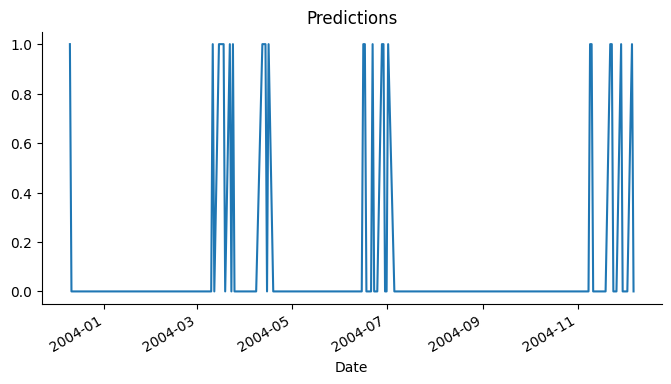

In [ ]:
from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)